# Binary Classifier Exercise

In this notebook we will create a Binary Classifier to predict the 'Target'

Steps to. be taken:
1) **Data exploration**
- check data types
- check for missing values
- check for outliers

2) **Data formatting & feature creation**
- check that all column values have the same format
- convert all data columns to numeric data

3) **Binary classifier model**
- split the data into train & test
- normalise the datasets
- create a classifier object
- complete a grid search to search the best hyperparameters
- using the optimal hyperparameters fit the classifier to the training data
- use the model to predict the test. data
- check the model accuracy


In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data1.csv')

# First explore the dataset

In [3]:
df#.head()

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
0,0.55,9.5,B,0.99740,NaN,32.0,10.0,1.90,0.58,3.13,0.22,0.080,9.0,0
1,0.32,12.7,A,0.99184,NaN,28.0,6.9,10.55,0.3,3.07,0.30,0.037,4.0,0
2,0.57,9.7,B,0.99743,NaN,86.0,7.2,2.30,0.66,3.53,0.03,0.078,16.0,0
3,0.50,9.5,B,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,A,0.99280,NaN,127.0,7.0,4.90,0.29,3.17,0.37,0.034,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.35,9.2,A,0.99240,NaN,30.0,5.6,0.80,0.29,3.36,0.05,0.038,11.0,0
6493,0.74,11.5,B,0.99780,NaN,14.0,11.6,3.65,0.53,3.05,0.66,0.121,6.0,1
6494,0.47,10.0,A,0.99480,NaN,159.0,7.2,1.80,0.15,3.52,0.39,0.043,21.0,0
6495,0.53,10.5,B,0.99860,3.0,21.0,11.1,3.10,0.35,3.17,0.48,0.090,5.0,0


In [4]:
df.describe()

,ComponentAge,MonthlyRunTime,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
count,6493.000000,6497.000000,6497.000000,805.000000,6497.000000,6487.000000,6495.000000,6488.000000,6494.000000,6495.000000,6497.000000,6497.000000
mean,0.531215,10.491801,0.994697,5.631056,115.744574,7.216579,5.444326,3.218395,0.318722,0.056042,30.525319,0.196552
std,0.148814,1.192712,0.002999,3.403142,56.521855,1.296750,4.758125,0.160748,0.145265,0.035036,17.749400,0.397421
min,0.220000,8.000000,0.987110,0.000000,6.000000,3.800000,0.600000,2.720000,0.000000,0.009000,1.000000,0.000000
25%,0.430000,9.500000,0.992340,3.000000,77.000000,6.400000,1.800000,3.110000,0.250000,0.038000,17.000000,0.000000
50%,0.510000,10.300000,0.994890,6.000000,118.000000,7.000000,3.000000,3.210000,0.310000,0.047000,29.000000,0.000000
75%,0.600000,11.300000,0.996990,9.000000,156.000000,7.700000,8.100000,3.320000,0.390000,0.065000,41.000000,0.000000
max,2.000000,14.900000,1.038980,11.000000,440.000000,15.900000,65.800000,4.010000,1.660000,0.611000,289.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ComponentAge          6493 non-null   float64
 1   MonthlyRunTime        6497 non-null   float64
 2   Location              6497 non-null   object 
 3   FlowRate              6497 non-null   float64
 4   OPXVolume             805 non-null    float64
 5   MaxOutputRate         6497 non-null   float64
 6   Sensor1               6487 non-null   float64
 7   Sensor2               6495 non-null   float64
 8   Sensor3               6497 non-null   object 
 9   Sensor4               6488 non-null   float64
 10  Sensor5               6494 non-null   float64
 11  Sensor5.1             6495 non-null   float64
 12  DaysSinceMaintenance  6497 non-null   float64
 13  Target                6497 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


### Convert data type

In the info above we found that Sensor 3 has data type 'Object'. This suggests that some values in this data are strings, rather than numeric.

If we attempt to convert the column to float we have an error that the string '-' cannot be converted to float. We can see these rows in the cell below.
We therefore replace this string with NaN, before again attempting to convert the column to float.

In [6]:
df.loc[df['Sensor3']=='-']

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target
282,0.50,9.0,A,0.99650,6.0,171.0,6.5,8.9,-,2.85,0.43,0.083,50.0,0
969,0.44,8.7,A,0.99740,NaN,156.0,7.2,11.0,-,3.09,0.63,0.044,55.0,0
1167,0.53,10.1,A,0.99520,NaN,227.0,NaN,6.2,-,3.29,0.29,0.046,29.0,0
2381,0.78,12.8,B,0.99414,NaN,102.0,7.2,2.5,-,3.27,0.33,0.068,34.0,0
4028,0.46,9.4,A,0.99254,NaN,111.0,6.5,1.2,-,2.99,0.19,0.041,30.0,0
5629,0.74,9.8,A,0.99420,NaN,143.0,7.9,2.1,-,3.05,0.26,0.039,8.0,0
5827,0.50,11.7,A,0.99014,NaN,68.0,6.4,1.4,-,3.15,0.36,0.044,22.0,1
6435,0.50,9.1,A,0.99405,NaN,160.0,6.4,1.1,-,3.42,0.28,0.055,9.0,1


In [7]:
df['Sensor3'] = df['Sensor3'].replace(to_replace='-',  value=np.nan).astype(float)

### Check for missing values in each column

First we can find the total number of missing values in each column

In a project I would discuss how to handle missing values - this could be:
- replace with the mean or median of the column
- remove the row

In [8]:
# find the total number of missing values
{column: df[column].isnull().sum() for column in df.columns}

{'ComponentAge': 4,
 'MonthlyRunTime': 0,
 'Location': 0,
 'FlowRate': 0,
 'OPXVolume': 5692,
 'MaxOutputRate': 0,
 'Sensor1': 10,
 'Sensor2': 2,
 'Sensor3': 8,
 'Sensor4': 9,
 'Sensor5': 3,
 'Sensor5.1': 2,
 'DaysSinceMaintenance': 0,
 'Target': 0}

## Check for outliers

Here we use a box plot to check for outliers.

The box plot plots the 25th and 75th quartiles as a box with a line for the median, and whiskers which are 1.5 times the interquartile range away from the quartiles.

Outliers will be beyond the range of the whiskers.

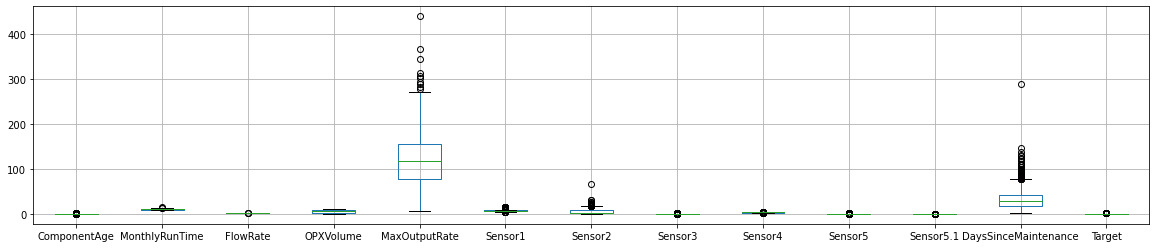

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
boxplot = df.boxplot(ax=ax)

### Normalise data and repeat

As the columns all have different scales it is difficult to see all of the columns in the plot above. Here we normalise the columns so that they all have a scale between 0 and 1 and reproduce the box plot.

In a project I would discuss with the project manager and client as to how to handle outliers.

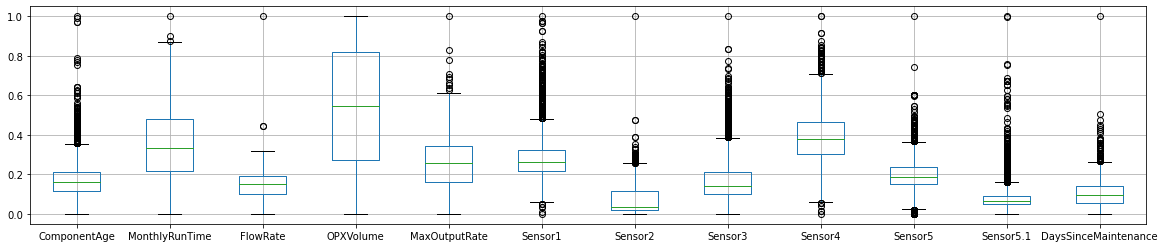

In [10]:
vars_drop = ['Location', 'Target']

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df.drop(vars_drop, axis=1)),
                       columns=[col for col in df.columns if col not in vars_drop])

fig, ax = plt.subplots(1, 1, figsize=(20, 4))
boxplot = df_norm.boxplot(ax=ax)

## Check for any correlations

We can plot all variables against each other to see if there are any correlations. We use a corner plot for this, which plots the variables against each other, and plots a histogram of each variable to view it's distribution.

In this plot we colour by Target value, where Target=0 is blue, and Target=1 is orange.

We see that there is an uneven split between the 2 target values i.e. more values equal to 0 than 1.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


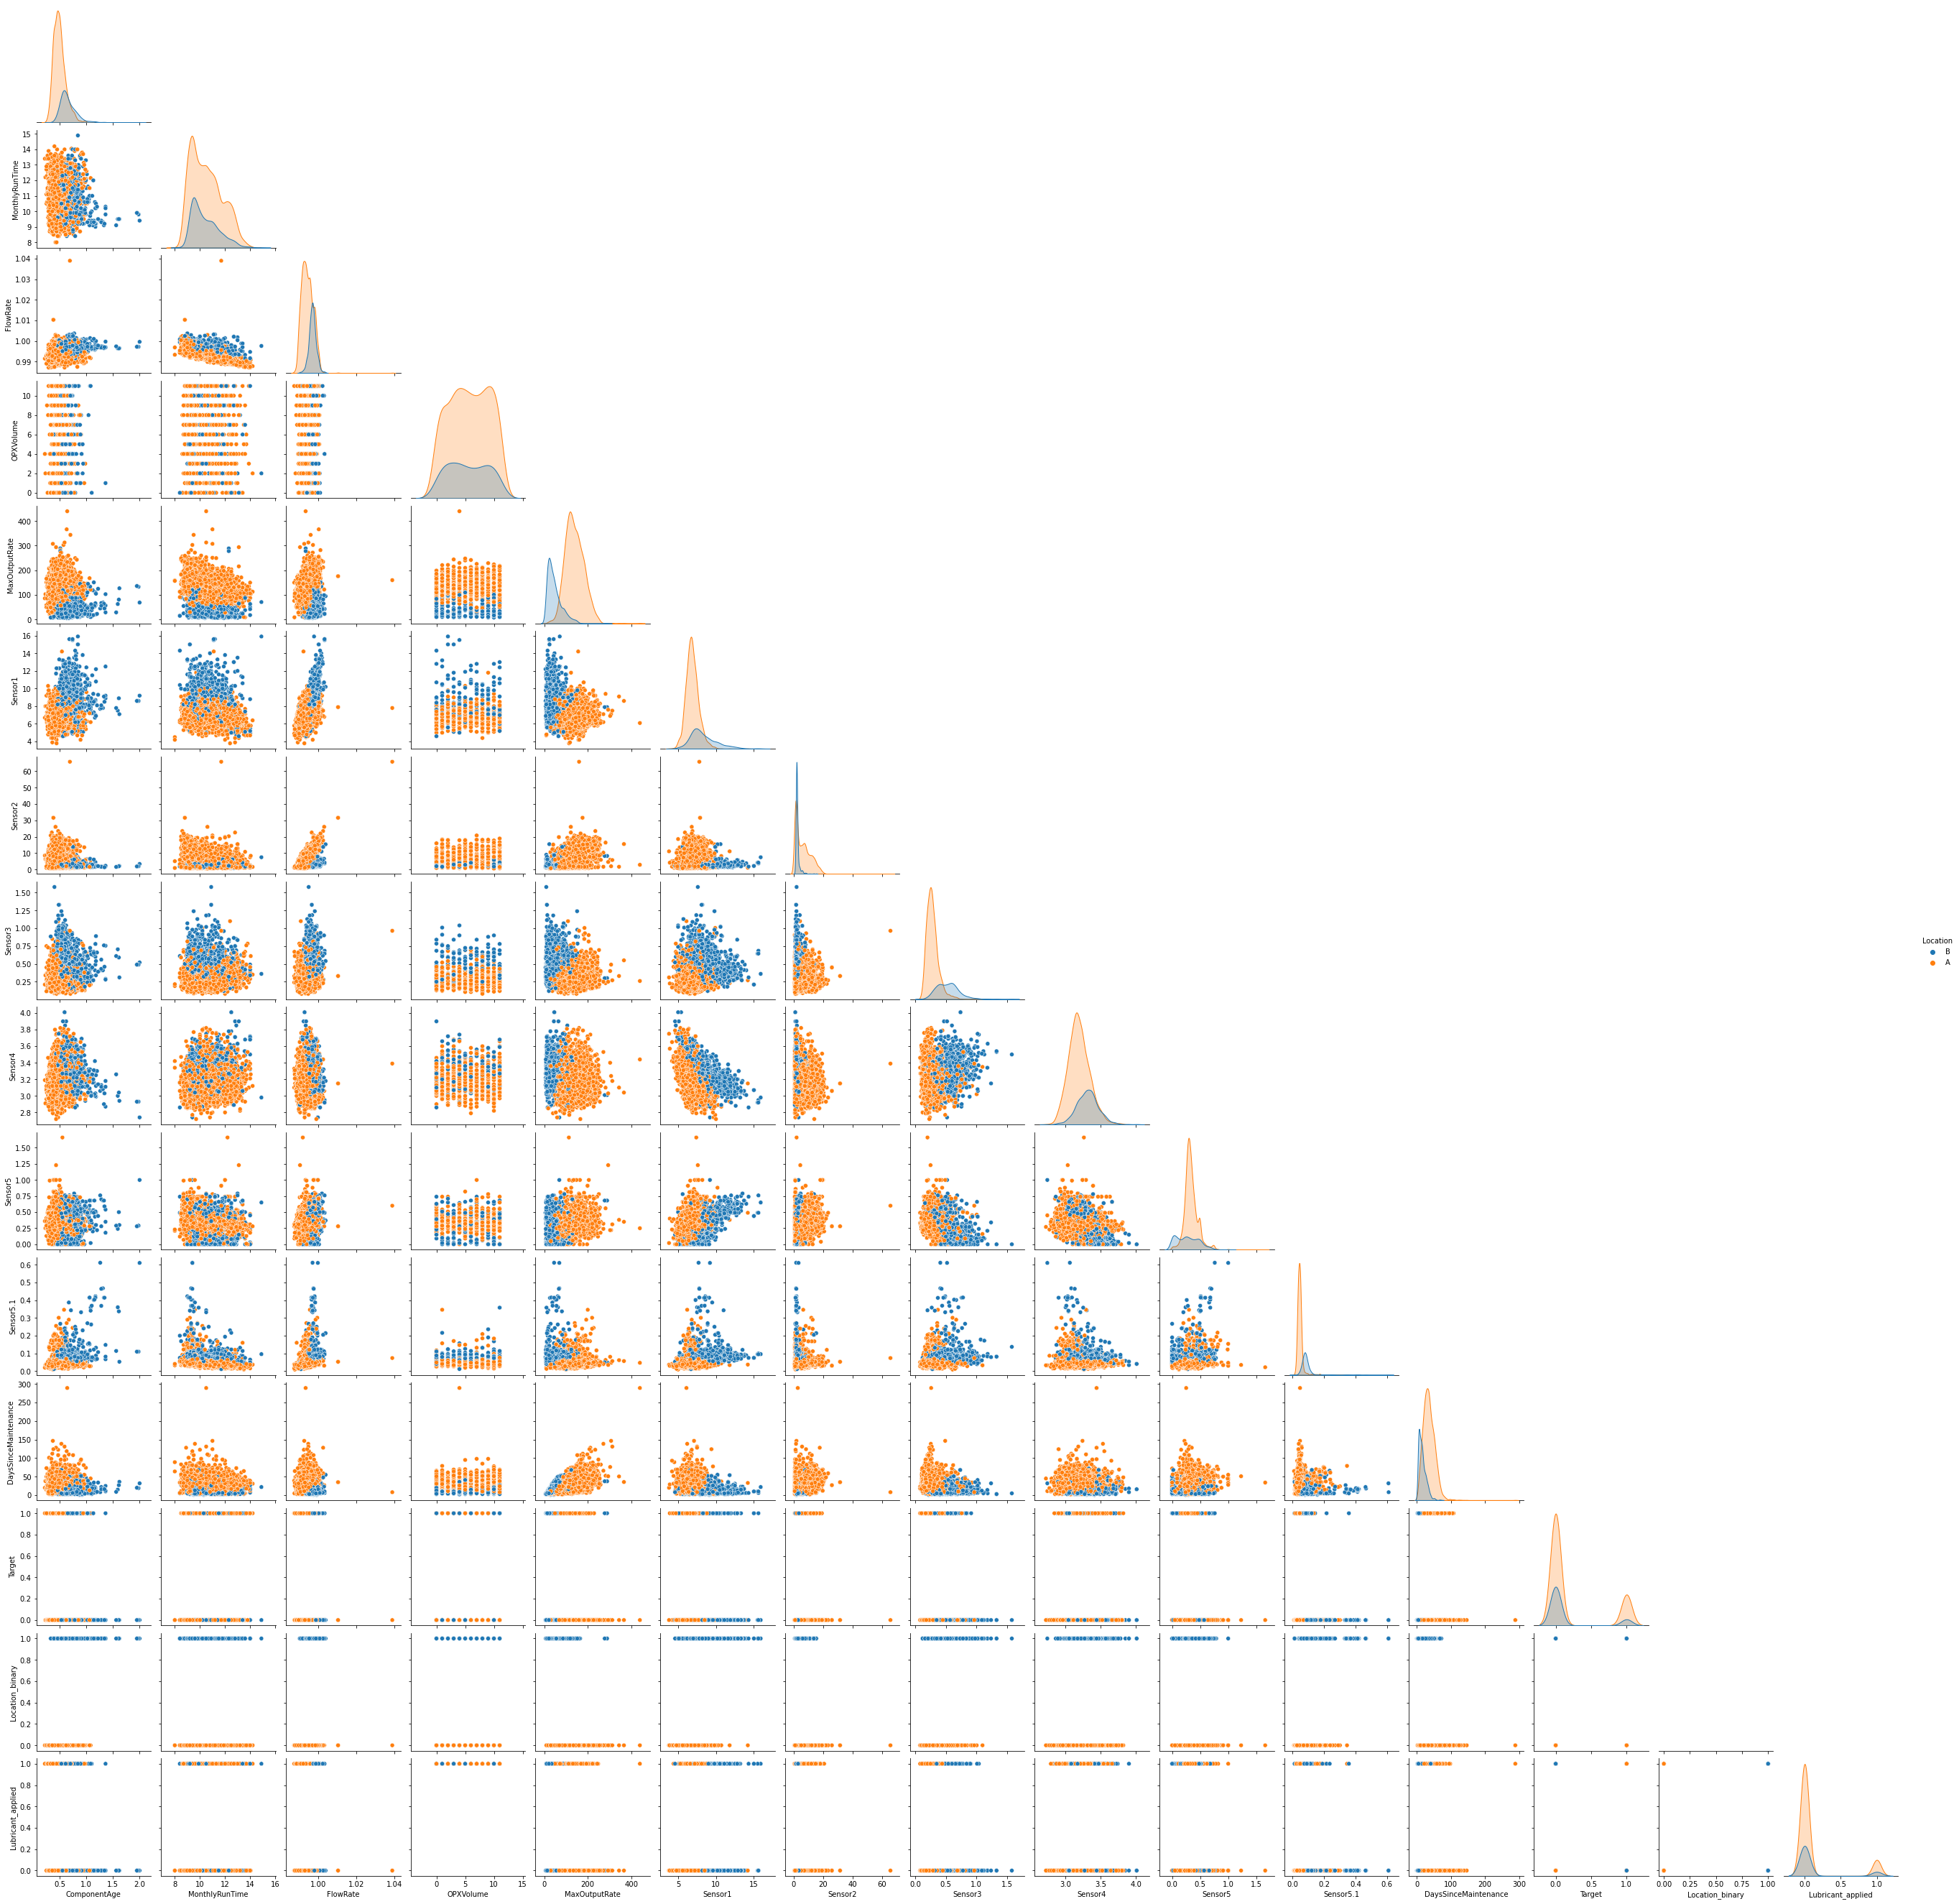

In [60]:
# sns.pairplot(df, hue="Target", corner=True)
sns.pairplot(df, hue="Location", corner=True)

We can check the number of each value in each column, which confirms that there is an uneven split between Target =0 and =1.

In [12]:
df[['Target', 'Location']].value_counts()

Target  Location
0       A           3838
        B           1382
1       A           1060
        B            217
dtype: int64

# New features

Create new feature for Location and OPXVolume

*Location:* The location column has string values of 'A' and 'B', as numeric data is more useful we can convert these  to numeric values.

*OPXVolume:* 
We saw in the dataframe above that the majority of rows have missing values for OPXVolume. In a project I would clarify, but here I am assuming that a missing value indicates that a lubricant has not been applied, therefore I can create a feature indicating whether or not a lubricant has been applied.

In [13]:
# first check that the unique values for location
print(sorted(df.Location.unique()))

# convert location from A and B to 0 and 1
df['Location_binary'] = df['Location']
[df['Location_binary'].replace(to_replace=letter,  value=value, inplace=True)
 for value, letter in enumerate(sorted(df.Location.unique()))];

['A', 'B']


In [14]:
# create a feature for lubricant not applied = 0, lubricant applied = 1
df['Lubricant_applied'] = (df['OPXVolume'].notnull()).astype('int')

In [15]:
df

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location_binary,Lubricant_applied
0,0.55,9.5,B,0.99740,NaN,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,1,0
1,0.32,12.7,A,0.99184,NaN,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,0,0,0
2,0.57,9.7,B,0.99743,NaN,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,1,0
3,0.50,9.5,B,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,1,0
4,0.44,10.8,A,0.99280,NaN,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.35,9.2,A,0.99240,NaN,30.0,5.6,0.80,0.290,3.36,0.05,0.038,11.0,0,0,0
6493,0.74,11.5,B,0.99780,NaN,14.0,11.6,3.65,0.530,3.05,0.66,0.121,6.0,1,1,0
6494,0.47,10.0,A,0.99480,NaN,159.0,7.2,1.80,0.150,3.52,0.39,0.043,21.0,0,0,0
6495,0.53,10.5,B,0.99860,3.0,21.0,11.1,3.10,0.350,3.17,0.48,0.090,5.0,0,1,1


# Run the machine learning

In this section we run the machine modelling routine

We are using a Random Forest classifier which is an ensemble method - it combines a set of decision trees

##  Format the data

Beefore running the model the data must be formatted in several ways to avoid bias and allow for testing the model.

### Downsample data

As the data is imbalanced in terms of how many instances of Target =0 compared with =1 the model may be biased to return the more common value (=0). To avoid this we balance the data, we do this by downsampling the more common value of Target.

In [50]:
df_target = {tt: df.loc[df['Target']==tt]
             for tt in df['Target'].unique()}
df_target[0] = resample(df_target[0],
                        replace=True,
                        n_samples=len(df_target[1]),
                        random_state=42)
df_downsampled = pd.concat([df_target[0], df_target[1]], ignore_index=False)
df_downsampled.sort_index(inplace=True)
df_downsampled.head()

,ComponentAge,MonthlyRunTime,Location,FlowRate,OPXVolume,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location_binary,Lubricant_applied
3,0.50,9.5,B,0.99593,NaN,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,1,0
4,0.44,10.8,A,0.99280,NaN,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,0,0
5,0.41,10.6,A,0.99300,NaN,76.0,7.0,2.10,0.220,3.20,0.33,0.052,15.0,0,0,0
8,0.30,11.9,A,0.99200,NaN,138.0,7.3,6.85,0.330,3.03,0.40,0.038,32.0,1,0,0
10,0.64,10.2,A,0.99720,NaN,234.0,7.1,6.80,0.300,3.49,0.36,0.055,44.5,0,0,0


### Set up the training and test datasets

First we split the original dataset into training and test sets.

These sets are completely independent such that we can train the model on one set of data, and then test how well the model makes predictions on our test set.

We also split into X and y, where X contains the features e.g. Location, Sensors etc, and y contains our target column, which we are aiming to predict.

In [52]:
vars_drop = ['Location', 'OPXVolume', 'Target']

X_train, X_test, y_train, y_test = train_test_split(df_downsampled.drop(vars_drop, axis=1),
                                                    df_downsampled['Target'],
                                                    test_size = 0.30)

### Format the training and test data

1. We saw in our data exploration that the data has *missing values*. We must fill or remove these values when running our classifier. Here we replace the missing values with the median of the associated column.
2. Our columns have *different scales*, which could bias our model to be unfairly affected by one of the variables with a larger scale. To avoid this we *normalise* the datasets.

In [53]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)

X_train_test_norm = {tt: globals()[tt] / globals()[tt].max()
                     for tt in ['X_train', 'X_test']}

## Set up the model

First we create a classifier object

In [54]:
clf = RandomForestClassifier()

### Grid search

Here we search inputs to the classifier model to identify which are the optimal hyperparameters to use.
GridSearchCV 

In [58]:
# dictionary of parameters. to test
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth' : [4,5,6,7,8],
              }

# create a grid search object
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid)
# fit the grid search models to the data
CV_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=8, n_estimators=500),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [59]:
print('Optimal hyperparameters:')
[print(f'    {parameter}: {value}')
 for parameter, value in CV_rfc.best_params_.items()];

Optimal hyperparameters:
    max_depth: 8
    n_estimators: 400


### Apply the model

1) Create a new classifier object using the optimal hyperparameters found in our grid search above

2) Train the model using the training data

3) Use the model to predict the test data

4) Return the accuracy of the model

In [57]:
# create a classifier. object
clf = RandomForestClassifier(**CV_rfc.best_params_)
# fit the model to the training data
clf.fit(X_train, y_train)
  
# run predictions on the test data
y_pred = clf.predict(X_test)

print(f'Model accuracy: {metrics.accuracy_score(y_test, y_pred)}')


ACCURACY OF THE MODEL:  0.8226857887874837
